<h1> Liner regresssion </h1>


<b><font color='red'> Co2 emissoion model</font><b>

In [14]:
#installation
!pip install matplotlib 
!pip install pylab 
!pip install pandas 
!pip install numpy  
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement pylab
ERROR: No matching distribution found for pylab


In [41]:
# remove this '''''' below if you need to download data set
'''!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'''

'!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'

In [73]:
#import section
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [74]:
# data set and data frame conversion
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [75]:
#data decribtion
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [76]:
#retriving important data for traing and testing 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


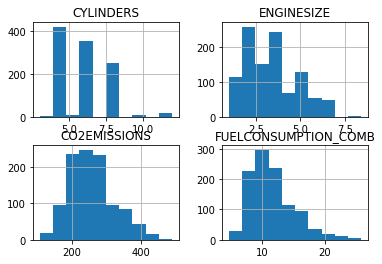

In [77]:
#histrograme of graph
viz=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<b>scatter diagrame</b>

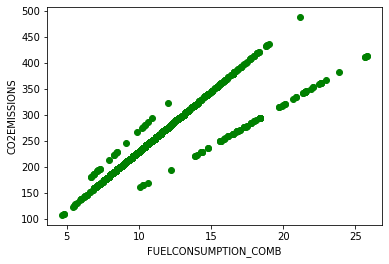

In [78]:
#fuel consumption vs co2 emission
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color='g')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

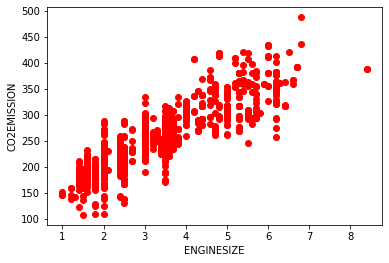

In [79]:
#Engine size vs co2emission
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

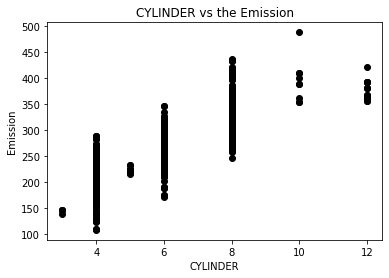

In [80]:
#cylinders vs co2emissions
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color='black')
plt.title('CYLINDER vs the Emission')
plt.xlabel('CYLINDER')
plt.ylabel('Emission')
plt.show()

<b> Training and testing of data </b>

In [81]:
# using some data for model training and some data for testing 
# here using <80% data for training and remaing for testing
msk = np.random.rand(len(df)) < 0.8

train_data = cdf[msk]
test_data = cdf[~msk]
print(msk) #[ True False  True ...  True False False]

[ True  True False ...  True  True False]


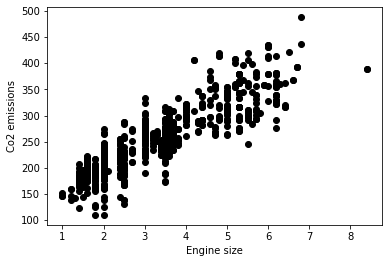

In [82]:
#traing data scatter graph
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS,color='black')
plt.xlabel('Engine size')
plt.ylabel('Co2 emissions')
plt.show()

<b> Modeling using sklearn </b>

In [84]:
model=linear_model.LinearRegression()
train_x=np.asanyarray(train_data[['ENGINESIZE']])
train_y=np.asanyarray(train_data[['CO2EMISSIONS']])
model.fit(train_x,train_y)
print('Coefficients:',model.coef_) 
print('Intercept: ',model.intercept_)

Coefficients: [[39.1713704]]
Intercept:  [124.65083233]


<solid> Fit Line</solid>

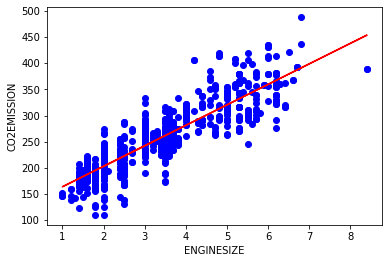

In [85]:
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS, color='b')
plt.plot(train_x,model.coef_[0][0]*train_x+model.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

<b> MSE Error </b>

In [86]:
test_x=np.asanyarray(test_data[['ENGINESIZE']])
test_y=np.asanyarray(test_data[['CO2EMISSIONS']])
y_predict=model.predict(test_x)
print('Mean absolute error: %.2f'% np.mean(np.absolute(y_predict - test_y)))
print('Residual sum of squres (MSE): %.2f ' % np.mean((y_predict - test_y)**2))
print('R2-score: %.2f' % r2_score(y_predict, test_y)) #acuracy of model
print('Mean Squared Error : %.2f' %mean_squared_error(test_y,y_predict))

Mean absolute error: 23.63
Residual sum of squres (MSE): 972.15 
R2-score: 0.68
Mean Squared Error : 972.15


<b><font color='red'> MAX accuracy at 70% of data = 80-85% </font></b><br><b><font color='green'>Avg accuracy = 69-73% </font></b>
